# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    #Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | ayancik
Processing Record 3 of Set 1 | ambodifotatra
Processing Record 4 of Set 1 | bartica
Processing Record 5 of Set 1 | chonchi
Processing Record 6 of Set 1 | salanso
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | banamba
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | las heras
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | smara
Processing Record 13 of Set 1 | benjamin aceval
Processing Record 14 of Set 1 | alaghsas
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | porto tolle
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | kitale
Processing Record 21 of Set 1 | lompoc
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,14.59,77,96,5.38,ZA,1695680390
1,ayancik,41.9447,34.5861,20.65,70,0,2.40,TR,1695680621
2,ambodifotatra,-16.9833,49.8500,23.83,71,41,4.51,MG,1695680621
3,bartica,6.4000,-58.6167,28.18,70,96,2.81,GY,1695680621
4,chonchi,-42.6128,-73.8092,10.56,72,85,2.10,CL,1695680622


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,14.59,77,96,5.38,ZA,1695680390
1,ayancik,41.9447,34.5861,20.65,70,0,2.40,TR,1695680621
2,ambodifotatra,-16.9833,49.8500,23.83,71,41,4.51,MG,1695680621
3,bartica,6.4000,-58.6167,28.18,70,96,2.81,GY,1695680621
4,chonchi,-42.6128,-73.8092,10.56,72,85,2.10,CL,1695680622


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

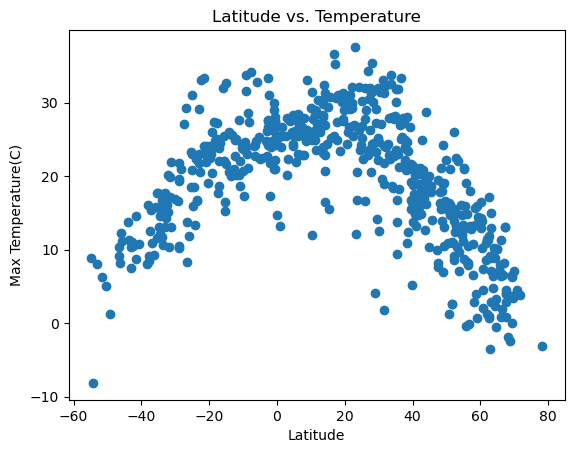

In [9]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df['Lat']
y_value = city_data_df['Max Temp']
plt.scatter(x_value,y_value)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('Latitude vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

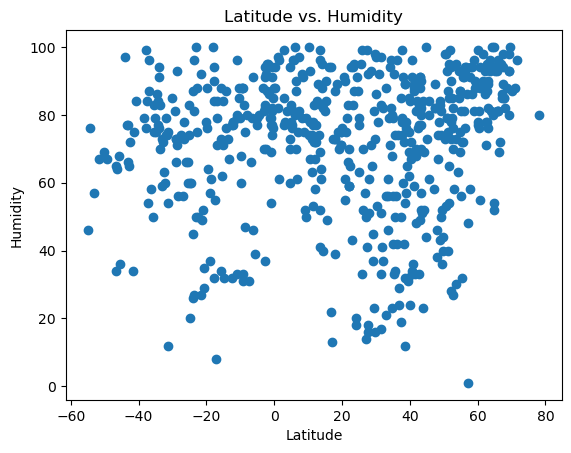

In [10]:
# Build the scatter plots for latitude vs. humidity
x_value = city_data_df['Lat']
y_value = city_data_df['Humidity']
plt.scatter(x_value,y_value)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

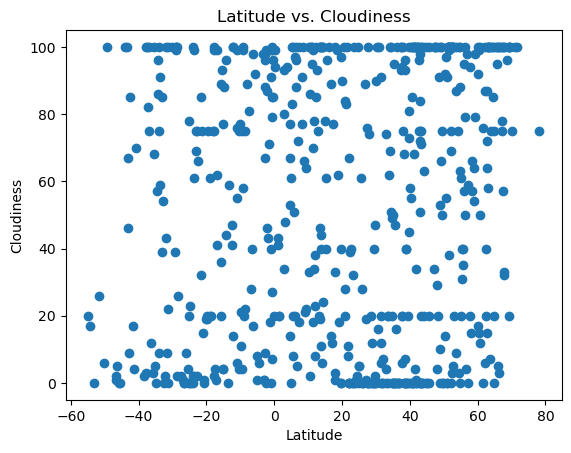

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df['Lat']
y_value = city_data_df['Cloudiness']
plt.scatter(x_value,y_value)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

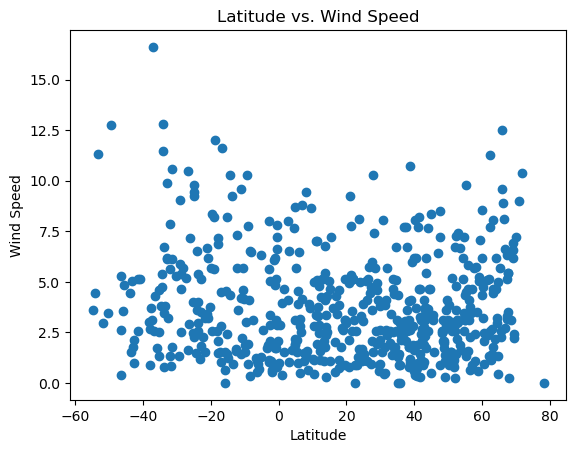

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df['Lat']
y_value = city_data_df['Wind Speed']
plt.scatter(x_value,y_value)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_regress(x_series, y_series, y_label, xy):
    #Create scatter plot 
    plt.scatter(x_values,y_values)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(f'Latitude vs. {y_label}')
    #Calculate linear regression 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Plot reggresssion line, and print print the r-squared value
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(xy), fontsize=15,color="red")
    print(f"R^2 value: {rvalue**2}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ayancik,41.9447,34.5861,20.65,70,0,2.40,TR,1695680621
3,bartica,6.4000,-58.6167,28.18,70,96,2.81,GY,1695680621
5,salanso,12.1833,-4.0833,26.36,72,85,1.60,BF,1695680622
7,banamba,13.5500,-7.4500,27.09,52,19,4.16,ML,1695680622
8,anadyr,64.7500,177.4833,3.28,100,75,5.00,RU,1695680623


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,14.59,77,96,5.38,ZA,1695680390
2,ambodifotatra,-16.9833,49.8500,23.83,71,41,4.51,MG,1695680621
4,chonchi,-42.6128,-73.8092,10.56,72,85,2.10,CL,1695680622
6,adamstown,-25.0660,-130.1015,20.78,74,78,9.25,PN,1695680622
9,las heras,-46.5419,-68.9359,10.35,34,1,5.30,AR,1695680623


###  Temperature vs. Latitude Linear Regression Plot

R^2 value: 0.593225903699951


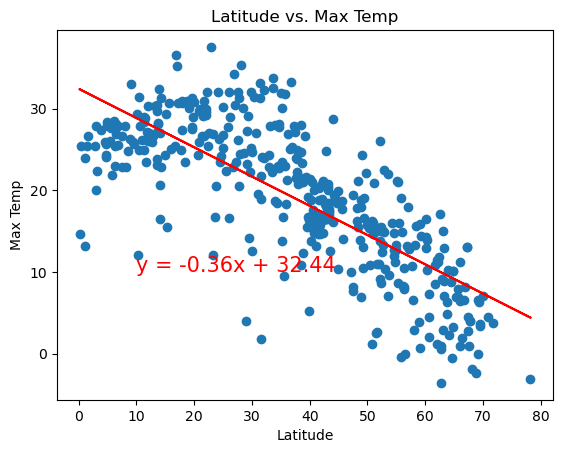

In [16]:
# Linear regression on Northern Hemisphere
y_label = "Max Temp"
annot_loc =[10,10]
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Max Temp"]

# Create scatter plot with line regression
lin_regress(x_values, y_values, y_label, annot_loc )

R^2 value: 0.610330760964255


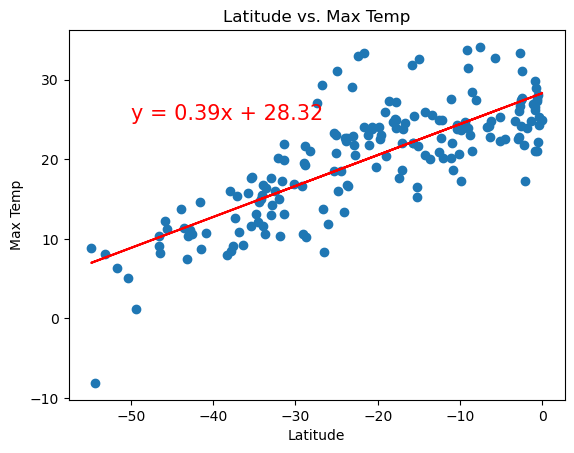

In [17]:
# Linear regression on Southern Hemisphere
y_label = "Max Temp"
annot_loc =[-50,25]
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df[y_label]

# Create scatter plot with line regression
lin_regress(x_values, y_values, y_label, annot_loc )

**Discussion about the linear relationship:** The data from the Northern Hemisphere appears to have an inverse relationship as found in the slope of the regression line. The R^2 value shows that 59% of this data can be explained, which is not necesarrly a strong or weak relationship. 

The data from the Souther Hemisphere suggests a postive relationship as found in the slope of the regression line. The R^2 value of 61% suggests that 61% of this data can be explained, which again, is not a strong or weak relationship.

### Humidity vs. Latitude Linear Regression Plot

R^2 value: 0.009981034779772285


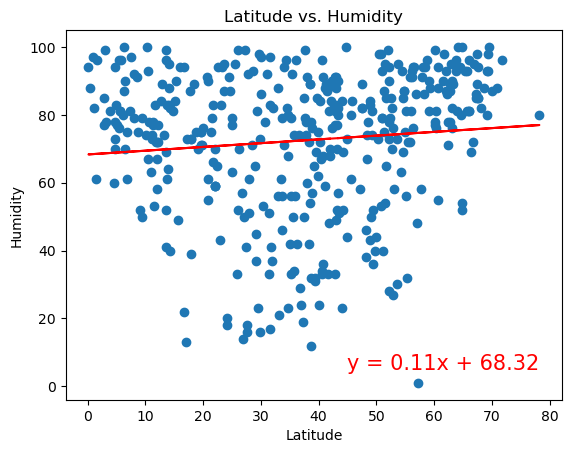

In [18]:
# Northern Hemisphere
y_label = "Humidity"
annot_loc =[45,5]
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df[y_label]

# Create scatter plot with line regression
lin_regress(x_values, y_values, y_label, annot_loc )

R^2 value: 0.016067135822846745


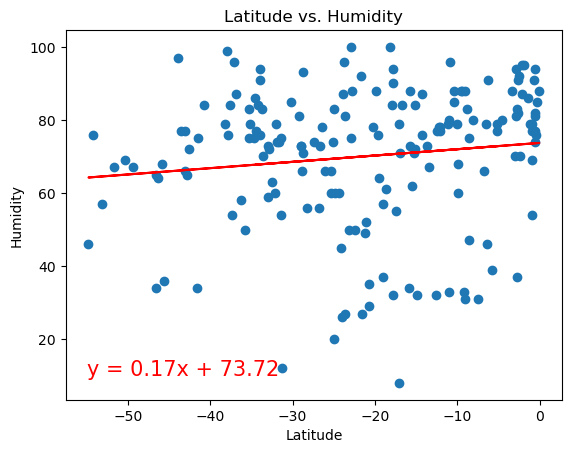

In [19]:
# Southern Hemisphere
y_label = "Humidity"
annot_loc =[-55,10]
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df[y_label]

# Create scatter plot with line regression
lin_regress(x_values, y_values, y_label, annot_loc )

**Discussion about the linear relationship:** Both relationships in the Northern and Souther Hemisphere appear to be weak relationships as shown by the very small R^2 values, the distance from plots in the scatter plot, and the weak slant in the regression line.

### Cloudiness vs. Latitude Linear Regression Plot

R^2 value: 0.015152495739123972


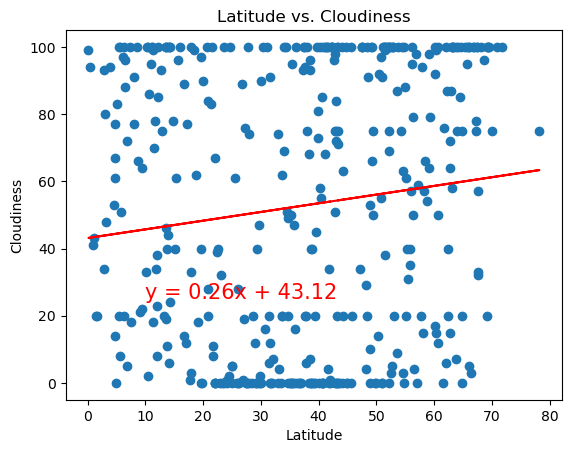

In [20]:
# Northern Hemisphere
y_label = "Cloudiness"
annot_loc =[10,25]
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df[y_label]

# Create scatter plot with line regression
lin_regress(x_values, y_values, y_label, annot_loc )

R^2 value: 0.018993180639119554


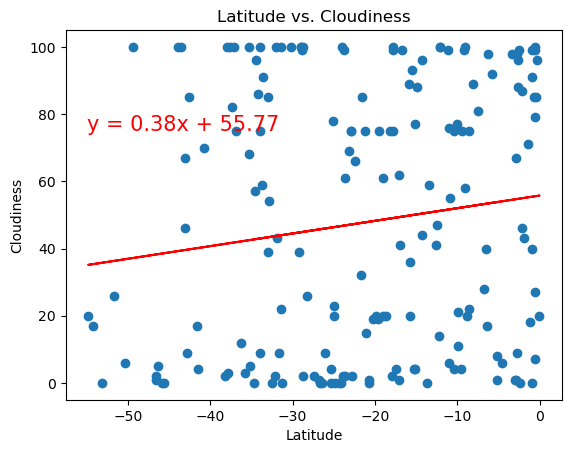

In [21]:
# Southern Hemisphere
y_label = "Cloudiness"
annot_loc =[-55,75]
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df[y_label]

# Create scatter plot with line regression
lin_regress(x_values, y_values, y_label, annot_loc )

**Discussion about the linear relationship:** Both R^2 values for the cloudiness vs Latitude regression plots in the Northern and Southern hemispheres are small. This suggests a weak relationship between Latitude and Cloudiness in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

R^2 value: 0.010194229937531779


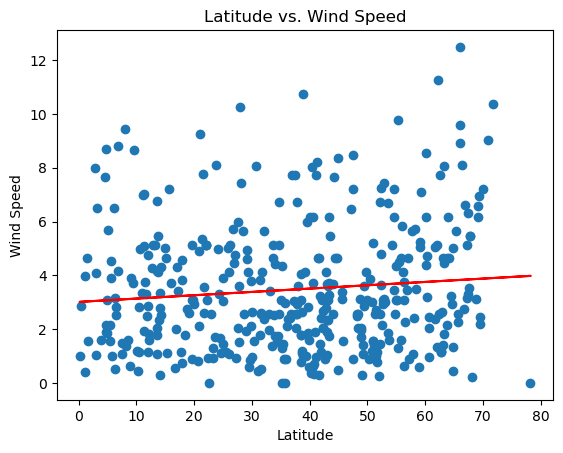

In [23]:
# Northern Hemisphere
y_label = "Wind Speed"
annot_loc =[45,14]
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df[y_label]

# Create scatter plot with line regression
lin_regress(x_values, y_values, y_label, annot_loc )

R^2 value: 0.02342591923943224


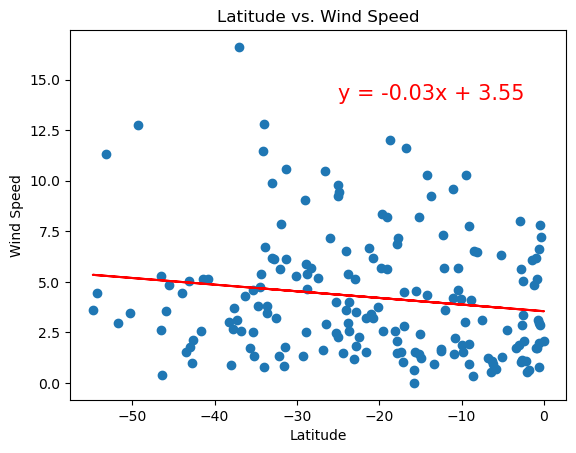

In [22]:
# Southern Hemisphere
y_label = "Wind Speed"
annot_loc =[-25,14]
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df[y_label]

# Create scatter plot with line regression
lin_regress(x_values, y_values, y_label, annot_loc )

**Discussion about the linear relationship:** Once again both R^2 values are small suggesting a weak relationship between wind speed and latitude in both hemispheres, however in the Northern hemisphere the relationship is weakly positive, and in the southern hemisphere the relationship is weakly inverse. 